In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import cv2

import utils

In [3]:
# only use cv2 in this cell
original = cv2.imread("data/gates_of_hell.jpeg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # converge BGR to RGB array

In [ ]:
cv2.cann

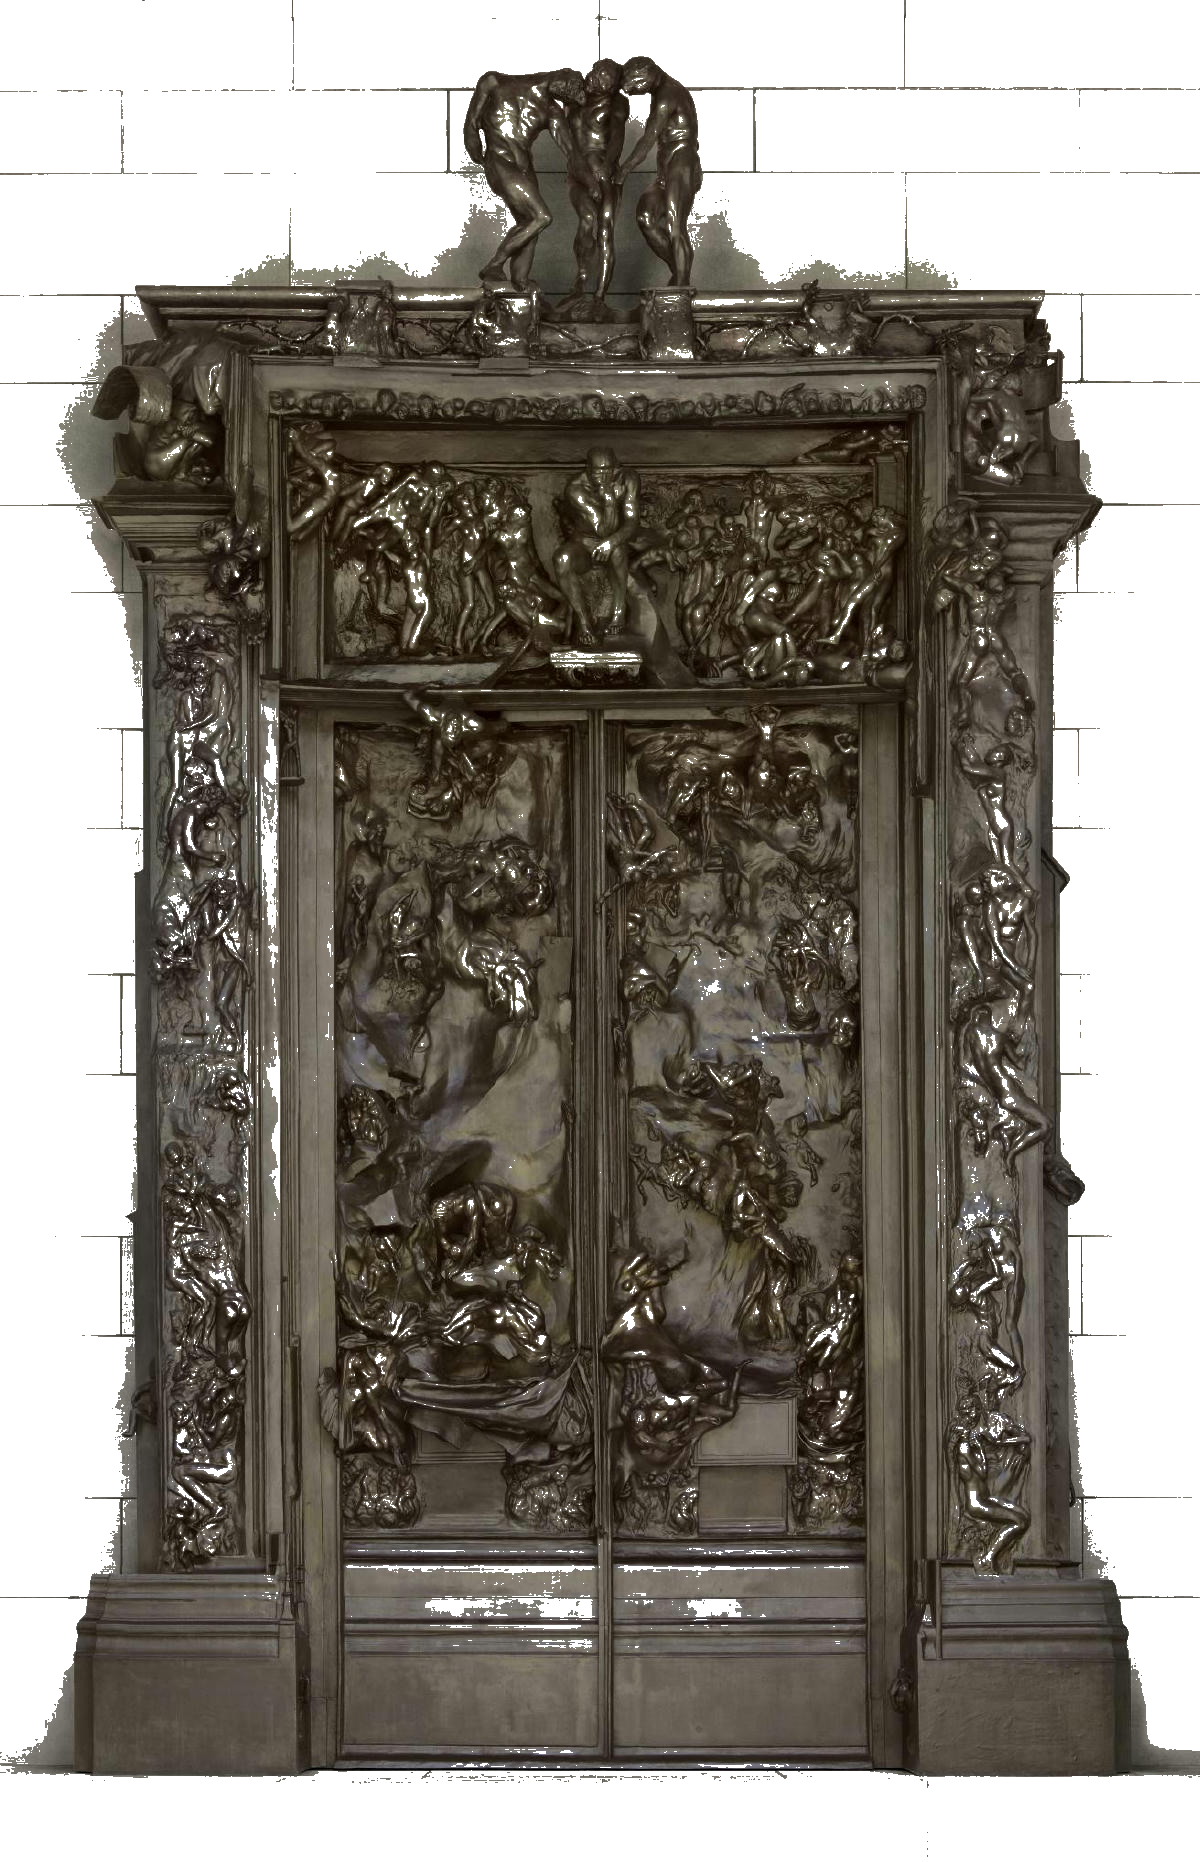

In [5]:
# manually edit
mask = (original >= [120, 120, 120]).all(-1)
modified = original.copy()
modified[mask] = [255, 255, 255]
output = Image.fromarray(modified.astype('uint8'))
output

In [6]:
def get_custom_otsu_threshold(image, mask):
    intraclass_variances = []
    img = image[mask]
    num_pixels = np.sum(mask)
    for threshold in np.arange(0, 255):  # NOTE: 0 = black, 255 = white
        black_pixels = img[img < threshold]
        white_pixels = img[img >= threshold]

        if not black_pixels.any() or not white_pixels.any():
            intraclass_variance = np.inf
        else:
            black_variance = np.var(black_pixels)
            white_variance = np.var(white_pixels)
            prob_black = len(black_pixels) / num_pixels
            prob_white = len(white_pixels) / num_pixels
            intraclass_variance = prob_black * black_variance + prob_white * white_variance
        intraclass_variances.append(intraclass_variance)

    otsu_threshold = np.argmin(intraclass_variances)
    return otsu_threshold, intraclass_variances

In [7]:
gate_threshold, _ = get_custom_otsu_threshold(img_gray, mask)

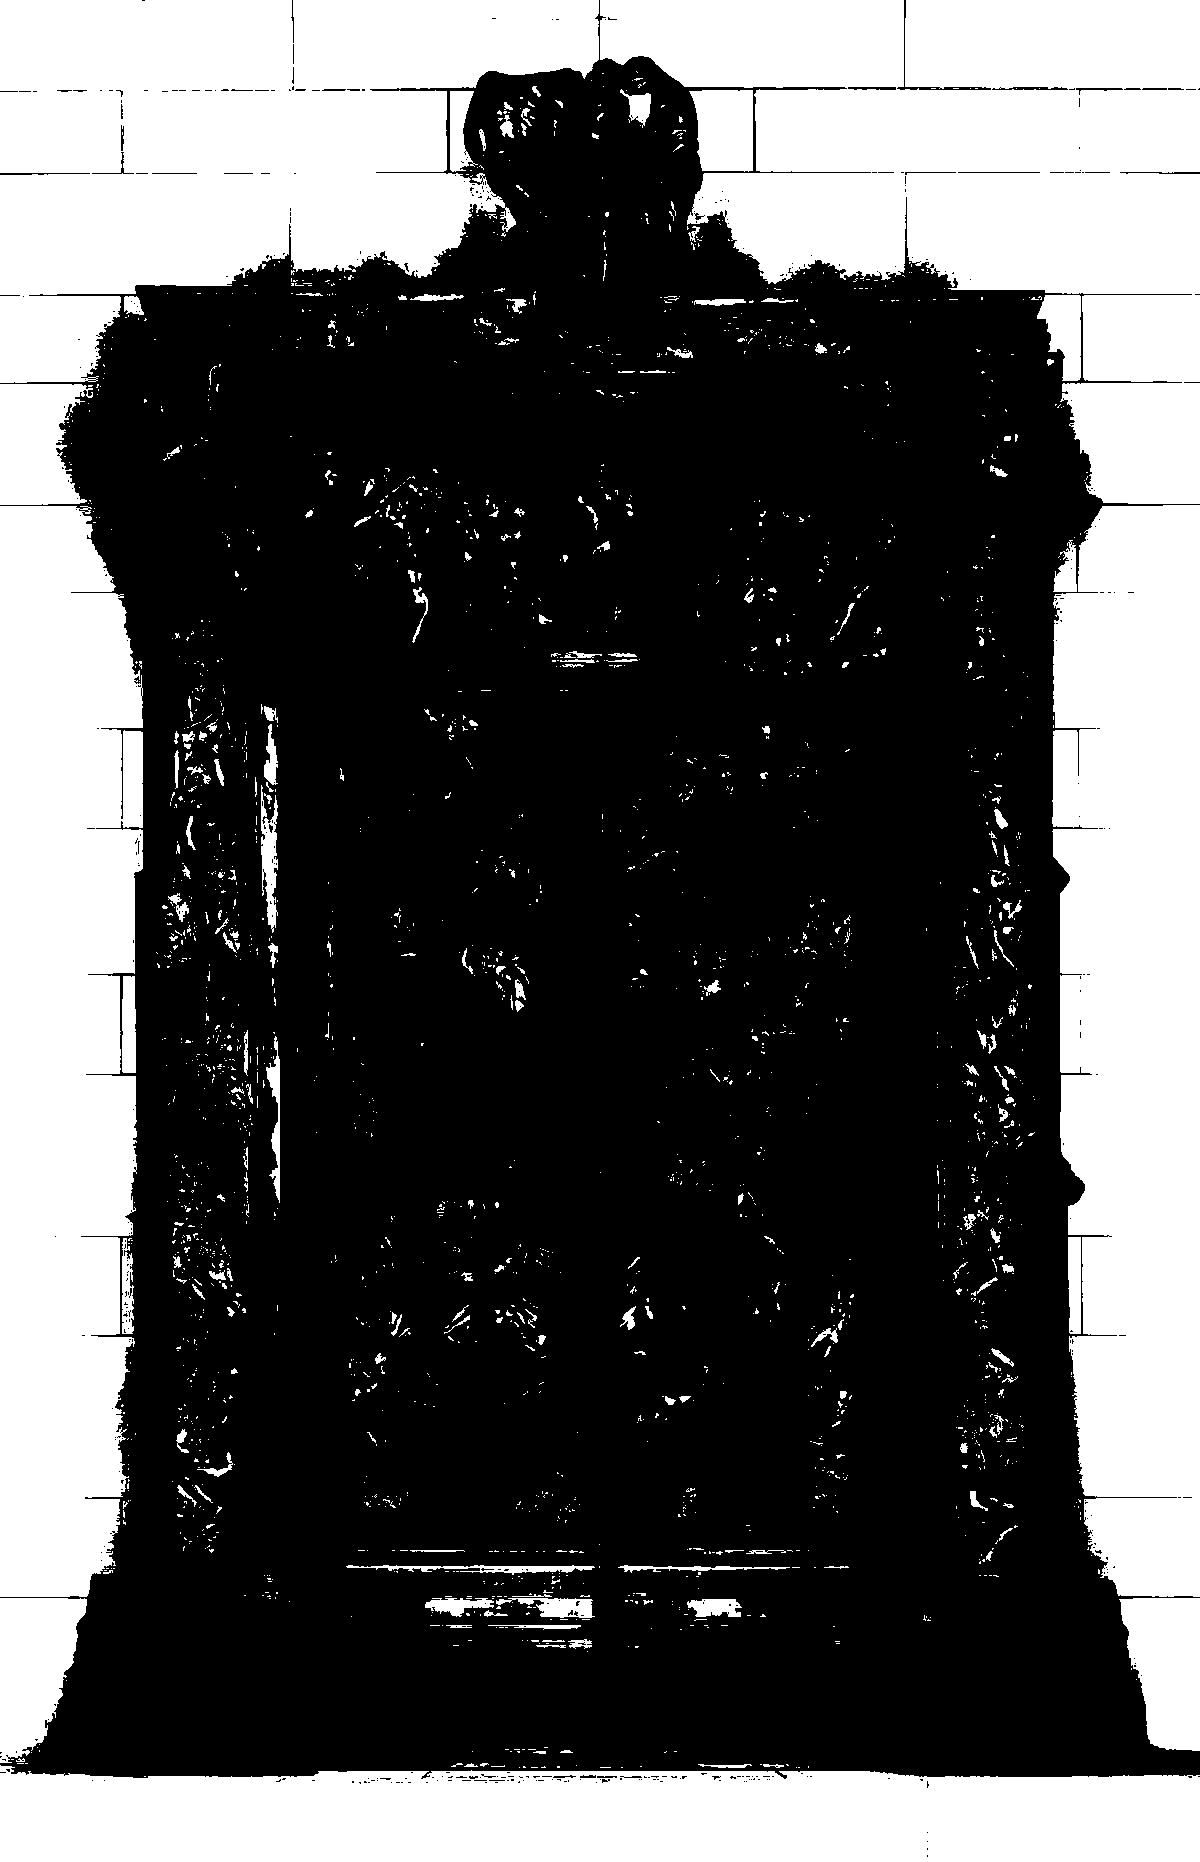

In [8]:
custom_bw = np.zeros_like(original)
custom_bw[mask & (img_gray > gate_threshold // 12)] = 255
output = Image.fromarray(custom_bw.astype('uint8'))
output

In [9]:
radius = 20
max_row, max_col = grayscale.shape
bw = np.zeros_like(grayscale)
for i, row in enumerate(tqdm(grayscale)):
    ymin = max(0, i - radius)
    ymax = min(max_row, i + radius)
    for j, center in enumerate(row):
        xmin = max(0, j - radius)
        xmax = min(max_col, j + radius)
        window = grayscale[ymin:ymax, xmin:xmax]  # get a square of 2*radius + 1
        if center >= np.median(window):
            bw[i, j] = max_rgb_value

NameError: name 'grayscale' is not defined

In [ ]:
output = Image.fromarray(original.astype('uint8'))
output